<a href="https://colab.research.google.com/github/FWWKCS/Machine-Learning/blob/main/02_%EC%A0%84%EB%B3%B5%20%EC%88%9C%EC%82%B4%20%EB%AC%B4%EA%B2%8C%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seed값 설정 (처음 실행만 랜덤, 이후엔 고정된 값)
seed = 0
np.random.seed(seed)

# 데이터 불러오기

In [9]:
# 전복 빅데이터 4177개 여덟 가지 속성
# 0 - 길이 | 1 - 직경 | 2 - 높이 | 3 - 중량 | 4 - 내장 무게 | 5 - 껍데기 무게 | 6 - 나이테 | 7 - 순살 무게

# Colab 파일(좌측 파일 창)에 데이터 업로드 후
try :
  df = pd.read_csv('abalone.csv')

# 드라이브 공유
except :
  url = 'https://drive.google.com/uc?export=download&id=18fnPvPptkskvYM-BXXv1XnYtPAR3ZiBn'
  df = pd.read_csv(url, delimiter=".")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      4177 non-null   float64
 1   직경      4177 non-null   float64
 2   두께      4177 non-null   float64
 3   전체무게    4177 non-null   float64
 4   내장무게    4177 non-null   float64
 5   껍질무게    4177 non-null   float64
 6   나이테     4177 non-null   int64  
 7   순살무게    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB
None
      길이     직경     두께    전체무게    내장무게   껍질무게  나이테    순살무게
0  0.455  0.365  0.095  0.5140  0.1010  0.150   15  0.2245
1  0.350  0.265  0.090  0.2255  0.0485  0.070    7  0.0995
2  0.530  0.420  0.135  0.6770  0.1415  0.210    9  0.2565
3  0.440  0.365  0.125  0.5160  0.1140  0.155   10  0.2155
4  0.330  0.255  0.080  0.2050  0.0395  0.055    7  0.0895


# 데이터 전처리

In [10]:
# 데이터 값 입력
# 독립 변수 X : 길이, 직경, 두께, 전체무게, 내장무게, 껍질무게, 나이테
# 종속 변수 Y : 순살 무게
dataset = df.values
X = dataset[0:4177 , 0:7]
Y = dataset[: , 7]

In [11]:
#훈련 데이터 70%, 테스트 데이터 30%로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2923, 7), (1254, 7), (2923,), (1254,))

# 선형 회귀 알고리즘으로 학습


In [13]:
# 머신러닝-지도 학습-회귀 인공지능 모델
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True)

In [14]:
# 모델 학습
model = lin_reg.fit(X_train, Y_train)

In [15]:
# 정확도 확인
print(f'정확도(R^2) = {model.score(X_train, Y_train)}')

정확도(R^2) = 0.9683422099452302


In [16]:
# 가중치와 편향 확인
w = model.coef_
b = model.intercept_

print(w)
print(b)

[ 0.13216544  0.07453926  0.03037804  0.69165655 -0.41884668 -0.68525444
 -0.00646454]
-0.014075705572578923


# 머신러닝 모델 테스트

In [17]:
Y_prediction = model.predict(X_test).flatten()
for i in range(10) :
    label = Y_test[i]
    prediction = Y_prediction[i]
    print(f'실제 살무게 : {label.round(3)}, 학습 후 예측 살무게 : {prediction.round(3)}')

실제 살무게 : 0.278, 학습 후 예측 살무게 : 0.314
실제 살무게 : 0.261, 학습 후 예측 살무게 : 0.267
실제 살무게 : 0.527, 학습 후 예측 살무게 : 0.531
실제 살무게 : 0.022, 학습 후 예측 살무게 : 0.016
실제 살무게 : 0.674, 학습 후 예측 살무게 : 0.665
실제 살무게 : 0.478, 학습 후 예측 살무게 : 0.492
실제 살무게 : 0.266, 학습 후 예측 살무게 : 0.257
실제 살무게 : 0.25, 학습 후 예측 살무게 : 0.29
실제 살무게 : 0.126, 학습 후 예측 살무게 : 0.14
실제 살무게 : 0.46, 학습 후 예측 살무게 : 0.508


# 딥러닝 모델 생성

In [18]:
# 머신러닝에서 사이킷런(sklearn)을 주로 사용
# 딥러닝은 케라스(keras), 텐서플로(tensorflow) 패키지를 주로 사용

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

In [22]:
# 딥러닝 모델
model = Sequential() # 딥러닝 모델 층 생성
model.add(Dense(28, input_dim = 7, activation = 'relu'))
# Dense(입력층 퍼셉트론 개수, 입력층에 한하여 속성의 개수, 활성화 함수)
model.add(Dense(7, activation = 'relu')) # 중간 은닉층
model.add(Dense(1)) # 출력층 ( 활성화 함수 없음 )

In [30]:
# 딥러닝 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

loss(오차) → 최소제곱법 이용

optimizer → 통계학의 '경사하강법'(adam)을 최적화

모델의 수행을 확인하기 위해 accuracy 체크

In [31]:
# 모델 컴파일 이후 데이터 학습
history = model.fit(X_train, Y_train, epochs=15, batch_size=10, validation_split=0.25)

# epochs : 학습 횟수
# batch_size : 데이터 소그룹 ( 2000개 이상의 훈련 데이터를 한 번에 학습 불가 )
# validation_split : 모델 기능 향상을 위해 모의시험을 치를때, 사용되는 검증 데이터 비율 설정값

Epoch 1/15
220/220 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 2/15
220/220 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 3/15
220/220 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 4/15
220/220 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 5/15
220/220 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 6/15
220/220 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 7/15
220/220 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0000e

loss(평균제곱오차) = 2.2g

val_loss(검증데이터 평균제곱오차) = 3.3g

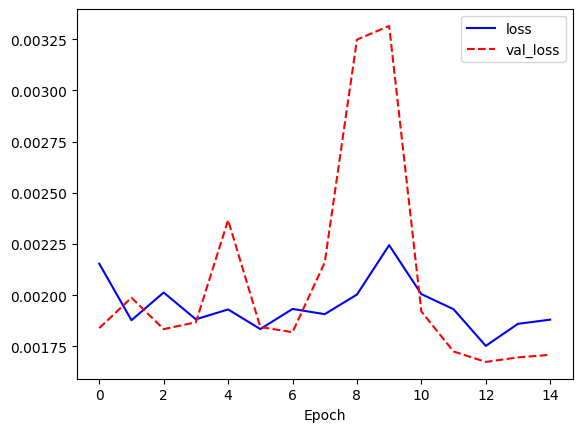

In [34]:
# 학습 횟수에 따른 오차 그래프
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [35]:
# 딥러닝 모델 평가
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.0000e+00


[0.0016262730350717902, 0.0]